# Void-Dislocation Interaction Test Case

Based on the analytical solution provided by Gavazza & Barnett (1974), and the implementation in Takahashi and Ghoniem (2008), we have the testcase as following:

* The solution of the stress:
$$
\tau_{yz}(t,0,z)=
\sum_{n=1}^\infty\left\{-a^{n+1}(2\mu_1\alpha_n+\mu_1\beta_n)+6\mu_1K_n\Omega_n\frac{2n+1}{2n+5}\right\}
    {1\over r^{n+2}}P^{n-1}_{n+1}
$$

$$ +
\sum_{n=1}^\infty\left\{-{1\over2}\mu_1a^{n+1}\beta_n+\mu_1K_n\Omega_n\frac{2n+3}{2n+5}\right\}
    {1\over r^{n+2}}P^{n+1}_{n+1}
$$

$$ +
\sum_{n=1}^\infty\left\{2\mu_1\left({a^2\over r^2}-1\right)K_n\Omega_n+\mu_1K_n\Omega_n\frac{2}{2n+5}\right\}
    {1\over r^{n+2}}P^{n+1}_{n+3}
$$

$$ +
\sum_{n=1}^\infty\left\{24\mu_1\left({a^2\over r^2}-1\right)K_n\Omega_n+\mu_1K_n\Omega_n\frac{24}{2n+5}\right\}
    {1\over r^{n+2}}P^{n-1}_{n+3}
$$

where,
$$
K_n=-\frac{\lambda_1 + \mu_1}{2[(n+2)\lambda_1+(3n+5)\mu_1]}
$$

$$
\Omega_n=\frac{2\eta_n(\mu_1-\mu_2)a^{2n+1}/t^n}{\mu_1[(n+2)+E_n^I(2n+1)(n+1)]+\mu_2(2n)}
$$

$$
\alpha_n=\frac{(\mu_1-\mu_2)\eta_n}{\mu_1(n+2)+\mu_2(n-1)}
\frac{\mu_1\{(n+2)-E_n^I(2n+1)(n-1)\}}{\mu_1{(n+2)+E_n^I(2n+1)(n+1)}+\mu_2(2n)}
\left({a\over t}\right)^n
$$

$$
\beta_n=\frac{(\mu_2-\mu_1)\eta_n}{\mu_1(n+2)+\mu_2(n-1)}
\frac{\mu_1\{(n+2)+E_n^I(2n+1)(n-1)\}+2\mu_2(n-1)}{\mu_1{(n+2)+E_n^I(2n+1)(n+1)}+\mu_2(2n)}
\left({a\over t}\right)^n
$$

$$
\eta_n=\left(b\over4\pi\right)\frac{(-1)^n2^n(n-1)!}{(2n-1)!}
$$

$$
E_n^I=\frac{1}{2n+1}\frac{(n-1)\lambda_1-(n+4)\mu_1}{(n+2)\lambda_1+(3n+5)\mu_1}
$$

$P_l^m$ is the *unnormalized Legendre Polynomial* with *Condon-Shortley Phase* coefficients.

In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
import pyshtools
import sys
sys.path.append('../module/')
from SHUtil import SphCoord_to_CartCoord, CartCoord_to_SphCoord
from SHUtil import SHCilmToVector, lmk2K, K2lmk
from SHTest import gavazza1974

[[ -1.83475557e-03  -1.30113965e-03  -9.45553837e-04  -7.09185252e-04
   -5.51454440e-04  -4.41503672e-04  -3.58698915e-04  -2.89870771e-04
   -2.39341981e-04  -2.02935187e-04  -1.66904943e-04  -1.06633838e-04
   -6.71862441e-05  -3.92569871e-05  -2.21224822e-05  -1.36125393e-05
   -9.31759425e-06  -6.18232821e-06  -4.27951366e-06  -4.08127499e-06]]
[[ 13.53035958  13.60536058  13.88286301  14.04797122  14.20001058
   13.84274326  13.87702846  14.09186746  14.34265243  13.53233626
   13.99206238  13.55994334  13.42053031  13.5427718   16.73408771
   17.84445382  23.35057123  14.68682461  23.7429193   33.68929584]]


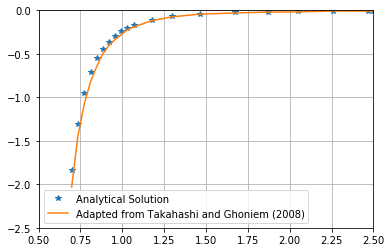

In [2]:
#### Takahashi & Ghoniem (2010) ####
mu1 = 81.8
mu2 = 54.6
nu1 = 0.3
nu2 = 0.25
a = 1.25
b = 0.248

tau_test = loadmat('../testdata/test_takahashi.mat')['Data001']

nmax = 100
zs = np.array([0, ])
ts = tau_test[:, 0]*a*2 #np.linspace(a+2*b, 5*a, 20)

tau_yz = gavazza1974(nmax, zs, ts, mu1, mu2, nu1, nu2, a, b)

print(tau_yz/mu1)
print(tau_test[:,1]/tau_yz)

plt.plot(ts/a/2, tau_yz.T/mu1*1000, '*')
plt.plot(tau_test[:,0], tau_test[:,1])
plt.xlim(0.5,2.5)
plt.ylim(-2.5, 0)
plt.grid(True)
plt.legend(['Analytical Solution', 'Adapted from Takahashi and Ghoniem (2008)'])
#plt.savefig('SHanalytical.png', transparent=True)
plt.show()

### Long range Esitimation

The long range esitimation given by Gavazza&Barnett(1974):

$$
f_x^\infty(t,0,z)=\frac{5\gamma b^2\mu_1a^3}{2\pi t}{1\over r^3}\left(1-2\nu_1+3\nu_1\frac{z^2}{r^2}\right)
$$

where 
$$
\gamma=\frac{\Gamma-1}{2\Gamma(4-5\nu_1)+7-5\nu_1},\quad \Gamma={\mu_2\over\mu_1}
$$

### Analytical solution implementation by Willis et al. (1972)

The void-dislocation interaction energy is given:

$$
E = -\frac{\mu b^2a}{4\pi}\sum_{n=1}^\infty \left({2a\over d}\right)^{2n}\frac{(n-1)!n!}{(2n+1)!}
    \left[1+\frac{(n+1)+2mn}{n+2}\right]
$$

where $m = (6-n)/(3n^2+7n+6)$

The force term is:

$$
F_1 = {\mu b^2\over2\pi a}\sum_{n=1}^\infty\frac{(-1)^n2^nn!}{(2n)!}\left(a^2\over rd\right)^nz
    \left\{P_{n+1}^{n-1}(\cos\theta)\left(\frac{1+(2n-1)m}{n+2}\right)
          -\frac{1+m}{2(n+2)}P_{n+1}^{n+1}(\cos\theta)
          +{3\over l}cos\theta(P_{n+2}^{n+1}(\cos\theta)+P_{n+2}^{n-1}(\cos\theta))
          -{6\over l}(1-z)(P_{n+3}^{n+1}(\cos\theta)+12P_{n+3}^{n-1}(\cos\theta))
    \right\}
$$

where $z=(a/r)^2$ and $l=2(3n^2+7n+6)$

In [3]:
from SHTest import willis1972

## Implementation of ShElastic Solution

First we import the libraries we developed:

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pyshtools
import sys
sys.path.append('../module/')
from SHUtil import SphCoord_to_CartCoord, CartCoord_to_SphCoord
from SHUtil import SHCilmToVector, lmk2K, K2lmk

Then we generate the meshgrid on the void surface for boundary conditions. 

In [5]:
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D

#### Gavazza & Barnett (1974) ####
mu = 2.65
nu = 0.347
a = 1
b = 1
t = ts[0]

#### Willis, Hayns & Bullough (1972) ####
r0 = 1 #r0= 1.25

mu0 = 1 #mu0= 81.8        # GPa
nu = 1./3 #nu = 0.305
b0 = 1 #b0 = 0.25
t0= 1.5*r0
x0 = np.linspace(0, 3, 30)*r0

mu= mu0/mu0
a = 1.0
b = b0/r0
t = t0/r0
x3= x0/r0

# zs = np.linspace(0,6,50)
# ts = [t, ]

#### traction mode matrix info ####
lJmax = 23 # max l degree for saving a single mode
lKmax = 20 # max cutoff l degree for modes
LJ = (lJmax+1)**2
LK = (lKmax+1)**2

#### create meshgrid for evaluation ####
## DH2 mesh
#Ngrid = 100
#theta = (np.arange(0,Ngrid)+0.0)/Ngrid*(np.pi)
#phi = (np.arange(0,2*Ngrid)+0.0)/(2*Ngrid)*(2*np.pi)
## GLQ mesh
latglq, longlq = pyshtools.expand.GLQGridCoord(lJmax)
theta = np.deg2rad(90 - latglq)
phi = np.deg2rad(longlq)

THETA,PHI = np.meshgrid(theta, phi)
R = np.ones_like(THETA)
X, Y, Z = SphCoord_to_CartCoord(R, THETA, PHI)
N = -np.stack((X/R, Y/R, Z/R), axis=-1)

Then we evaluate traction boundary conditions on the spherical surface. We have a spherical void center at the origin with radius $a$, and a RH screw dislocation at $(t,0,0)$, with $\hat{\xi}=\hat{\mathbf{e}}_z$, with a burger's vector magnitude of $b$. The stress field induced by the dislocation in an infinite medium can be written as $\mathbf{\sigma}^\infty$, with the only two non-zero terms:

$$
\sigma_{xz}^\infty = -\frac{\mu b}{2\pi}\frac{y}{(x-t)^2+y^2} \\
\sigma_{yz}^\infty = \frac{\mu b}{2\pi}\frac{x-t}{(x-t)^2+y^2}
$$

In [6]:
def fvplot2d(fv, title=None):
    fmax, fmin = fv.max(), fv.min()
    fcolors = (fv - fmin)/(fmax - fmin)    # normalize the values into range [0, 1]
    fig0 = plt.figure(figsize=(10, 5))
    ax0 = fig0.add_subplot(111)
    cax0 = ax0.imshow(fv, extent=(0, 360, -90, 90), cmap='viridis')
    ax0.set(xlabel='longitude', ylabel='latitude')
    if not (title is None):
        ax0.set(title=title)
    fig0.colorbar(cax0)
    #fig1 = plt.figure(i*2+1, figsize=plt.figaspect(1.))  # make the axis with equal aspects
    #ax1= fig1.add_subplot(111, projection='3d')   # add an subplot object with 3D plot
    #ax1.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=cm.viridis(fcolors))
    #ax1.set(xlabel='x', ylabel='y', zlabel='z')
    return fig0, ax0, cax0

(47, 24, 3, 3)
(47, 24, 3)


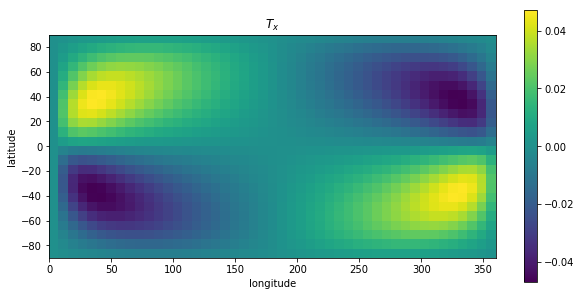

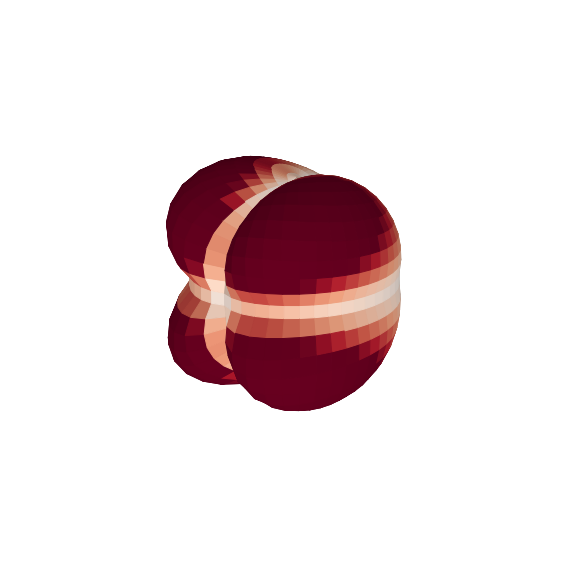

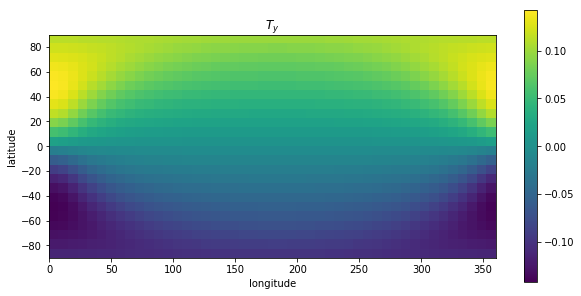

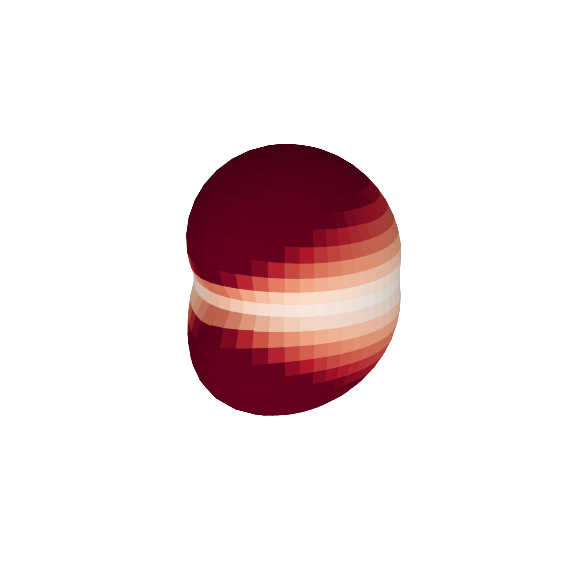

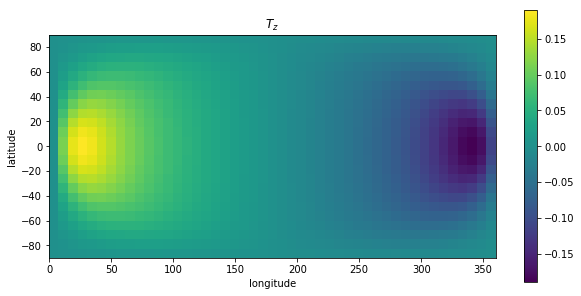

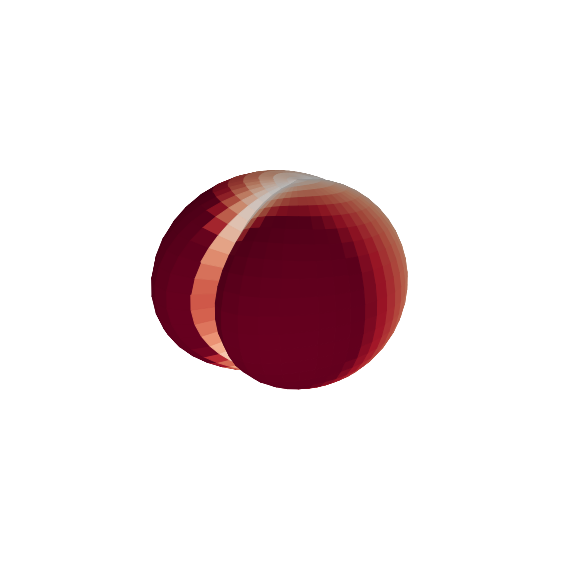

In [7]:
#### generate boundary condition ####
sigma_inf = np.zeros(THETA.shape+(3, 3))
mub = mu*b
sigma_inf[:, :, 0, 2] = -mub/2/np.pi * Y/((X-t)**2+Y**2)
sigma_inf[:, :, 2, 0] = -mub/2/np.pi * Y/((X-t)**2+Y**2)
sigma_inf[:, :, 1, 2] =  mub/2/np.pi * (X-t)/((X-t)**2+Y**2)
sigma_inf[:, :, 2, 1] =  mub/2/np.pi * (X-t)/((X-t)**2+Y**2)

print(sigma_inf.shape)

sigma_0 = sigma_inf; sigma_inf = sigma_0/mu0
T_inf = np.einsum('ijkl,ijl->ijk', sigma_0, N)

T_usr_mesh = T_inf.astype(np.complex)
print(T_usr_mesh.shape)

ttl = ['$T_x$','$T_y$','$T_z$']
T_usr_vec = np.empty(3*LJ, dtype=np.complex)
for k in range(3):
    fvplot2d(T_usr_mesh[:,:,k].real.T, title=ttl[k])
    T_usr_grid = pyshtools.SHGrid.from_array(T_usr_mesh[...,k].T, grid='GLQ')
    T_usr_grid.plot3d(elevation=20, azimuth=45)
    T_usr_cilm = T_usr_grid.expand()
    T_usr_vec[LJ*k:LJ*(k+1)] = SHCilmToVector(T_usr_cilm.to_array(), lmax = lJmax)

Then we expand the traction boundary conditions to spherical harmonic modes:

In [8]:
#### load the full and sub matrix ####
import scipy.sparse as spm
from scipy.io import loadmat, savemat
from ShElastic import calSmode
from SHBV import generate_submat, visualize_Cmat

shtype = 'irr'
Tmodes = loadmat('Tmodes.mat')
Tmodes = (Tmodes['T1'+shtype], Tmodes['T2'+shtype], Tmodes['T3'+shtype], Tmodes['T0'+shtype])
fullCmat = calSmode(Tmodes, mu, nu)
#lJfull = 43; lKfull = 40;
Cmat = generate_submat(mu, nu, fullCmat, lKmax, lJmax)

#plt.figure(figsize=(24,24))
#visualize_Cmat(Cmat, precision=1e-8)
#plt.show()

Then we solve for the linear problem:

In [9]:
from SHBV import print_SH_mode
import time
tic = time.time()
A = spm.linalg.lsqr(Cmat, T_usr_vec.transpose())
toc = time.time()
print('Residual:', A[3], 'Time:', toc-tic)
A_sol = np.zeros_like(A[0])
A_sol[np.abs(A[0]) > 1e-8] = A[0][np.abs(A[0]) > 1e-8]
print('Solution:', A_sol.size)
#index_sol = print_SH_mode(A_sol, m_dir=3)

Residual: 1.566551668773373e-05 Time: 0.1164252758026123
Solution: 1323


Then we integrate the stress solution:

(47, 24, 3, 3) 2.3333394527435303


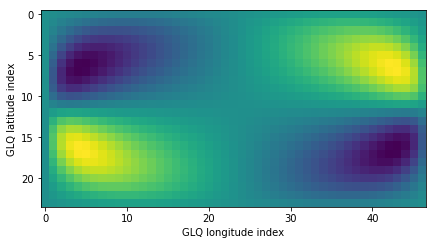

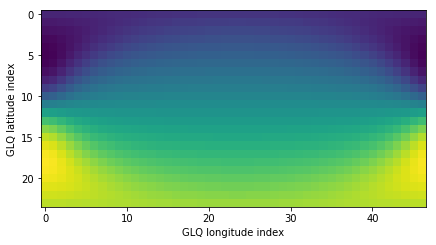

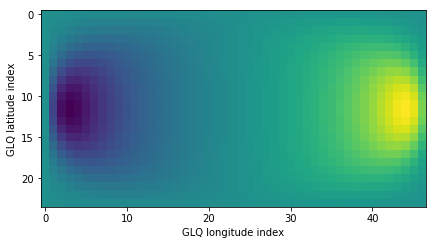

In [10]:
from SHBV import fast_stress_solution

Smodes = loadmat('Smodes.mat')
Smodes = (Smodes['S1'+shtype], Smodes['S2'+shtype], Smodes['S3'+shtype], Smodes['S0'+shtype])
fullSmodes = calSmode(Smodes, mu, nu)
Smodes = generate_submat(mu, nu, fullSmodes, lKmax, lJmax, kJ=9)

tic = time.time()
sigma_tot = fast_stress_solution(A_sol, X, Y, Z, Smodes, lKmax, lJmax)
toc = time.time()
print(sigma_tot.shape, toc-tic)

T_sol = np.sum(sigma_tot*N[...,np.newaxis,:], axis=-1)

for k in range(3):
    T_sol_grid = pyshtools.SHGrid.from_array(T_sol[...,k].T, grid='GLQ')
    T_sol_grid.plot()#3d(elevation=20, azimuth=-45)

In [11]:
from SHBV import fast_stress_solution

xs, ys, zs = np.meshgrid([t, ], [0, ], x3)

Smodes = loadmat('Smodes.mat')
Smodes = (Smodes['S1'+shtype], Smodes['S2'+shtype], Smodes['S3'+shtype], Smodes['S0'+shtype])
fullSmodes = calSmode(Smodes, mu, nu)
Smodes = generate_submat(mu, nu, fullSmodes, lKmax, lJmax, kJ=9)

tic = time.time()
sigma_tot = fast_stress_solution(A_sol, xs, ys, zs, Smodes, lKmax, lJmax)
toc = time.time()
print(sigma_tot.shape, toc-tic)

(1, 1, 30, 3, 3) 0.2573843002319336


(1, 1, 30)


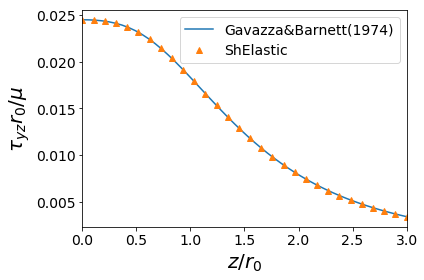

In [12]:
print(sigma_tot[:,:,:,1,2].shape)
tau_ShE = sigma_tot[:,:,:,1,2].flatten()

x3zT= np.linspace(0, 3, 50)*r0
x3z = np.linspace(0, 3, 100)*r0

tau_yz = gavazza1974(50, x3zT, [t0, ], mu0, 0, nu, nu, r0, b0)
#F1, Fa, F = willis1972(r0, t0, 50, x3z,mu=mu0,b=b0)

plt.figure()
plt.plot(x3zT/r0, -tau_yz/mu0*r0, label='Gavazza&Barnett(1974)')
#plt.plot(x3z, np.sum(F1[:, :], axis=1)/b0, '--')
plt.plot(x3, -tau_ShE.flatten()*r0, '^', label='ShElastic')
plt.xlabel(r'$z/r_0$', fontsize=20)
plt.xlim(0, 3)
#plt.ylim(0, 8)
plt.ylabel(r'$\tau_{yz}r_0/\mu$', fontsize=20)
plt.tick_params(labelsize=14)
plt.tight_layout()
plt.legend(fontsize=14)
plt.show()

(16, 2)
(1, 50, 1, 3, 3) 0.40123414993286133
error:  [ 0.01082436  0.02640503  0.03862481  0.03845759  0.01122444  0.01208294
  0.01142687  0.02413909  0.03693129  0.00447603  0.00619878  0.03483011
  0.01830646  0.04426353  0.05511275  0.58776966]


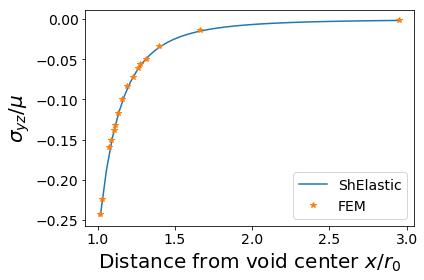

In [13]:
t0 = 1.5*r0

FEM = loadmat('../testdata/screw.mat')['M']
print(FEM.shape)
xrange = np.linspace(FEM[:,0].min(), FEM[:,0].max())

xs, ys, zs = np.meshgrid(xrange, [0, ], [0, ])
tic = time.time()
sigma_tot = fast_stress_solution(A_sol, xs, ys, zs, Smodes, lKmax, lJmax)
toc = time.time()
print(sigma_tot.shape, toc-tic)

xs, ys, zs = np.meshgrid(FEM[:, 0], [0, ], [0, ])
sigma_sol = fast_stress_solution(A_sol, xs, ys, zs, Smodes, lKmax, lJmax)[...,1,2].flatten()
plt.plot(xrange, sigma_tot[...,1, 2].flatten(), label='ShElastic')
plt.plot(FEM[:, 0], -FEM[:, 1], '*', label='FEM')
plt.legend(fontsize=14)
plt.tick_params(labelsize=14)
plt.xlabel('Distance from void center $x/r_0$', fontsize=20)
plt.ylabel(r'$\sigma_{yz}/\mu$', fontsize=20)
print('error: ', np.abs((sigma_sol+FEM[:,1])/sigma_sol))
plt.tight_layout()
#plt.savefig('../figures/case2-FEM.png', transparent=True, dpi=1000)
plt.show()

In [14]:
# save the data to matfile
from scipy.io import savemat, whosmat

n = 2
filename = '../figures/case2-FEM.mat'
obj_x = np.empty((n,), dtype=np.object)
obj_y = np.empty((n,), dtype=np.object)
obj_label = np.empty((n,), dtype=np.object)

obj_x[0], obj_x[1] = (xrange, FEM[:, 0])
obj_y[0], obj_y[1] = (sigma_tot[...,1,2].flatten(), FEM[:, 1])
obj_label[0] = 'ShElastic'
obj_label[1] = 'FEM'

savemat(filename, {'X': obj_x, 'Y': obj_y, 'label': obj_label})
whosmat(filename)
#print(loadmat(filename)['label'])

[('Y', (1, 2), 'cell'), ('X', (1, 2), 'cell'), ('label', (1, 2), 'cell')]

### The convergence of the ShElastic solution

We next generate the solution using different degrees of spherical harmonics to get accuracy curve:

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as spm
import pyshtools
import sys
sys.path.append('../module/')
from SHUtil import SphCoord_to_CartCoord, CartCoord_to_SphCoord
from SHUtil import SHCilmToVector, lmk2K, K2lmk
from SHBV import fast_stress_solution, generate_submat
import time

In [16]:
def tauyz_ShElastic(lKmax, z0, t0, r0, b0, mu0=None, nu=None, Tmodes=None, Smodes=None):
    tic = time.time()
    if mu0 is None:
        mu0 = 1.0
    mu = 1.0; r = 1.0; b = b0/r0; t = t0/r0; x3 = z0/r0;
    lJmax = lKmax + 3; LJ = (lJmax+1)**2;
    latglq, longlq = pyshtools.expand.GLQGridCoord(lJmax)
    theta = np.deg2rad(90 - latglq)
    phi = np.deg2rad(longlq)
    THETA,PHI = np.meshgrid(theta, phi)
    R = np.ones_like(THETA)
    X, Y, Z = SphCoord_to_CartCoord(R, THETA, PHI)
    N = -np.stack((X/R, Y/R, Z/R), axis=-1)
    print('constructing grids...', N.shape)

    sigma_inf = np.zeros(THETA.shape+(3, 3))
    sigma_inf[..., 0, 2] = -mu*b/2/np.pi * Y/((X-t)**2+Y**2)
    sigma_inf[..., 2, 0] =  sigma_inf[..., 0, 2]
    sigma_inf[..., 1, 2] =  mu*b/2/np.pi * (X-t)/((X-t)**2+Y**2)
    sigma_inf[..., 2, 1] =  sigma_inf[..., 1, 2]
    print('calculating infinite stress field...', sigma_inf.shape)

    T_inf = np.einsum('ijkl,ijl->ijk', sigma_inf, N)
    T_usr_mesh = T_inf.astype(np.complex)
    T_usr_vec = np.empty(3*LJ, dtype=np.complex)
    for k in range(3):
        T_usr_grid = pyshtools.SHGrid.from_array(T_usr_mesh[...,k].T, grid='GLQ')
        T_usr_cilm = T_usr_grid.expand()
        T_usr_vec[LJ*k:LJ*(k+1)] = SHCilmToVector(T_usr_cilm.to_array(), lmax = lJmax)
    toc = time.time()
    print('setting up the boundary condition...', toc-tic)

    tic = time.time()
    if Tmodes is None:
        shtype = 'irr'; Tmodes = loadmat('Tmodes.mat');
        Tmodes = (Tmodes['T1'+shtype], Tmodes['T2'+shtype], Tmodes['T3'+shtype], Tmodes['T0'+shtype])
    if Smodes is None:
        Smodes = loadmat('Smodes.mat')
        Smodes = (Smodes['S1'+shtype], Smodes['S2'+shtype], Smodes['S3'+shtype], Smodes['S0'+shtype])
    if not (nu is None):
        Tmodes = calSmode(Tmodes, mu, nu)
        Smodes = calSmode(Smodes, mu, nu)
    Cmat = generate_submat(mu, nu, Tmodes, lKmax, lJmax, kJ=3)
    Smodes = generate_submat(mu, nu, Smodes, lKmax, lJmax, kJ=9)
    toc = time.time()
    print('construct the traction matrix for solving...', toc-tic)

    tic = time.time()
    A = spm.linalg.lsqr(Cmat, T_usr_vec.T)
    toc = time.time()
    solve_time=toc-tic
    print('Residual:', A[3], 'Solving time:', toc-tic)
    A_sol = np.zeros_like(A[0])
    A_sol[np.abs(A[0]) > 1e-8] = A[0][np.abs(A[0]) > 1e-8]
    n_active = A_sol.nonzero()[0].size
    print('Solution:', A_sol.size, 'Active modes:', n_active)

    xs, ys, zs = np.meshgrid([t, ], [0, ], x3)
    tic = time.time()
    sigma_tot = fast_stress_solution(A_sol, xs, ys, zs, Smodes, lKmax, lJmax)
    toc = time.time()
    reconstruct_time=toc-tic
    print('reconstruction time:', toc-tic)
    return (sigma_tot*mu0, n_active, solve_time, reconstruct_time)

In [23]:
a = 1.25; b = 0.25; t = 1.2*a; # nm
mu = 77; nu = 0.27; # Carbon Steel
x3 = np.linspace(0, 3)

analytical = gavazza1974(80, x3*a, [t, ], mu, 0, nu, nu, a, b)
mode_list = np.hstack((np.arange(1, 5), np.arange(5, 41, 5)))[::-1]
fx_list = []
active_list = []
solve_time = []
reconstruct_time = []
error_list = []
shtype = 'irr'; Tmodes = loadmat('Tmodes.mat'); Smodes = loadmat('Smodes.mat')
Tmodes = (Tmodes['T1'+shtype], Tmodes['T2'+shtype], Tmodes['T3'+shtype], Tmodes['T0'+shtype])
Smodes = (Smodes['S1'+shtype], Smodes['S2'+shtype], Smodes['S3'+shtype], Smodes['S0'+shtype])
Tmodes = calSmode(Tmodes, 1.0, nu)
Smodes = calSmode(Smodes, 1.0, nu)

for lKmax in mode_list:
    print('lKmax =', lKmax)
    sigma, act_mode, tsolve, tconstruct = tauyz_ShElastic(lKmax, x3*a, t, a, b, mu0=mu, Tmodes=Tmodes, Smodes=Smodes)
    err = np.absolute((sigma[:,:,:,1,2].flatten()-analytical.flatten())/analytical.flatten()).max()
    print('relative error =', err)
    error_list.append(err)
    fx_list.append(sigma)
    active_list.append(act_mode)
    solve_time.append(tsolve)
    reconstruct_time.append(tconstruct)

lKmax = 40
constructing grids... (87, 44, 3)
calculating infinite stress field... (87, 44, 3, 3)
setting up the boundary condition... 0.011680126190185547
construct the traction matrix for solving... 0.09551620483398438
Residual: 4.377846554776689e-06 Solving time: 1.2288661003112793
Solution: 5043 Active modes: 420
reconstruction time: 0.7947113513946533
relative error = 1.95873043821e-06
lKmax = 35
constructing grids... (77, 39, 3)
calculating infinite stress field... (77, 39, 3, 3)
setting up the boundary condition... 0.003138303756713867
construct the traction matrix for solving... 0.03445148468017578
Residual: 1.1549107847569234e-05 Solving time: 0.6163794994354248
Solution: 3888 Active modes: 384
reconstruction time: 0.6910824775695801
relative error = 1.00635381286e-05
lKmax = 30
constructing grids... (67, 34, 3)
calculating infinite stress field... (67, 34, 3, 3)
setting up the boundary condition... 0.0029268264770507812
construct the traction matrix for solving... 0.0289335250

[('Y', (1, 5), 'cell'), ('X', (1, 5), 'cell'), ('label', (1, 5), 'cell')]


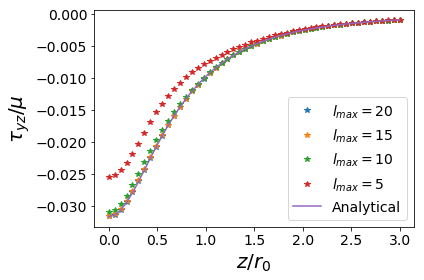

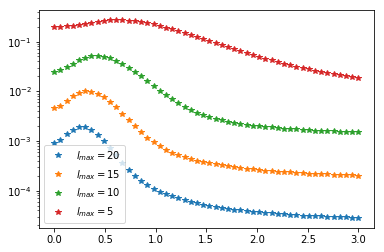

In [18]:
# save the data to matfile
from scipy.io import savemat, whosmat

filename = '../figures/case2-result.mat'
n = 5
obj_x = np.empty((n, ), dtype=np.object)
obj_y = np.empty((n, ), dtype=np.object)
obj_label = np.empty((n, ), dtype=np.object)

plt_idx = [4,5,6,7]
#total_time = np.array()
plt.figure()
for i in range(4):
    obj_x[i] = x3.copy()
    obj_y[i] = fx_list[plt_idx[i]][...,1,2].flatten()/mu
    obj_label[i] = r'l_{max} = %i'%mode_list[plt_idx[i]]
    plt.plot(x3, fx_list[plt_idx[i]][...,1,2].flatten()/mu, '*', label=r'$l_{max} = %i$'%mode_list[plt_idx[i]])

obj_x[-1] = x3.copy(); obj_y[-1] = analytical/mu; obj_label[-1] = 'Analytical'
savemat(filename, {'X': obj_x, 'Y': obj_y, 'label': obj_label})
print(whosmat(filename))
    
plt.plot(x3, analytical/mu, label='Analytical')
plt.legend(fontsize=14)
plt.xlabel(r"$z/r_0$", fontsize=20)
plt.ylabel(r'$\tau_{yz}/\mu$', fontsize=20)
plt.tick_params(labelsize=14)
plt.tight_layout()
#plt.savefig('../figures/case2-result.png', dpi=1000, transparent=True)
plt.figure()
for i in plt_idx:
    sigma = fx_list[i]
    plt.semilogy(x3, -(sigma[...,1,2].flatten()-analytical.flatten())/analytical.flatten(), '*',  label=r'$l_{max} = %i$'%mode_list[i])
plt.legend()
#plt.savefig('figures/case2-result-semilog.png', dpi=1000)
plt.show()

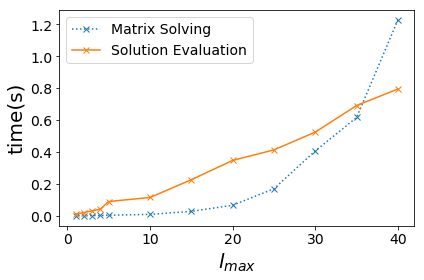

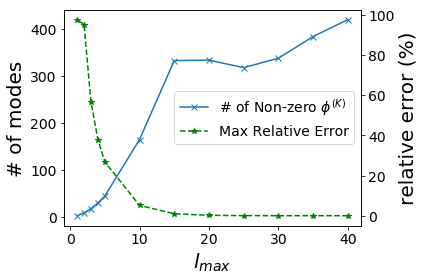

In [24]:
plt.figure()
plt.plot(mode_list, solve_time, ':x', label='Matrix Solving')
plt.plot(mode_list, reconstruct_time, '-x', label='Solution Evaluation')
plt.xlabel('$l_{max}$', fontsize=20)
plt.ylabel('time(s)', fontsize=20)
plt.legend(fontsize=14)
plt.tick_params(labelsize=14)
plt.tight_layout()
#plt.savefig('../figures/case3-time.png', dpi=1000, transparent=True)

error_list = []
for sigma in fx_list:
    error_list.append((-(sigma[...,1,2].flatten()-analytical.flatten())/analytical.flatten()).max())

fig, ax1 = plt.subplots()
ln1 = ax1.plot(mode_list, active_list, '-x')
ax1.set_xlabel('$l_{max}$', fontsize=20)
ax1.set_ylabel('# of modes', fontsize=20)
ax2 = ax1.twinx()
ln2 = ax2.plot(mode_list, np.array(error_list)*100, '--*g', label='relative error')
ax2.set_ylabel('relative error (%)', fontsize=20)

ax1.legend(ln1+ln2, [r'# of Non-zero $\phi^{(K)}$','Max Relative Error'], loc='right', fontsize=14)
ax1.tick_params(labelsize=14)
ax2.tick_params(labelsize=14)
plt.tight_layout()
#plt.savefig('../figures/case3-err.png', dpi=1000, transparent=True)
plt.show()

[('Y', (1, 3), 'cell'), ('X', (1, 3), 'cell'), ('label', (1, 3), 'cell')]


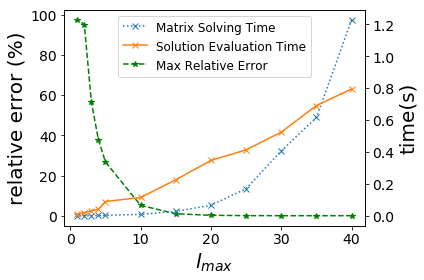

In [25]:
filename = '../figures/case2-err.mat'
n = 3
obj_x = np.empty((n, ), dtype=np.object)
obj_y = np.empty((n, ), dtype=np.object)
obj_label = np.empty((n, ), dtype=np.object)
obj_x[0], obj_x[1], obj_x[2] = \
    (np.array(mode_list), np.array(mode_list), np.array(mode_list))
obj_y[0], obj_y[1], obj_y[2] = \
    (np.array(error_list), np.array(solve_time), np.array(reconstruct_time))
obj_label = np.array(['Max Relative Error', 'Matrix Solving Time', 'Solution Evaluation Time'], dtype=np.object)
savemat(filename, {'X': obj_x, 'Y': obj_y, 'label': obj_label})
print(whosmat(filename))

fig, ax1 = plt.subplots()
ln3 = ax1.plot(mode_list, np.array(error_list)*100, '--*g')
ax1.set_ylabel('relative error (%)', fontsize=20)
ax1.set_xlabel('$l_{max}$', fontsize=20)
ax2 = ax1.twinx()
ln1 = ax2.plot(mode_list, solve_time, ':x')
ln2 = ax2.plot(mode_list, reconstruct_time, '-x')
ax2.set_ylabel('time(s)', fontsize=20)

legends = ['Matrix Solving Time', 'Solution Evaluation Time', 'Max Relative Error']
ax1.legend(ln1+ln2+ln3, legends, loc='upper center', fontsize=12)
#ax2.legend()
ax1.tick_params(labelsize=14)
ax2.tick_params(labelsize=14)
plt.tight_layout()
#plt.savefig('../figures/case2-err.png', dpi=1000, transparent=True)
plt.show()

In [27]:
x3 = np.linspace(0, 3)
ts = np.arange(2.0, 1.0, -0.1)*a
lKmax = 20
fx_list = []
active_list = []
solve_time = []
reconstruct_time = []
error_list = []

for tvalue in ts:
    print('t =', tvalue/a)
    sigma, act_mode, tsolve, tconstruct = tauyz_ShElastic(lKmax, x3*a, tvalue, a, b, mu0=mu, Tmodes=Tmodes, Smodes=Smodes)
    analytical = gavazza1974(80, x3*a, [tvalue, ], mu, 0, nu, nu, a, b)
    fx_list.append(sigma)
    rel_error = ((sigma[...,1,2].flatten()-analytical.flatten())/analytical.flatten()).max()
    error_list.append(rel_error)
    print('max relative error =', rel_error)
    active_list.append(act_mode)
    solve_time.append(tsolve)
    reconstruct_time.append(tconstruct)

t = 2.0
constructing grids... (47, 24, 3)
calculating infinite stress field... (47, 24, 3, 3)
setting up the boundary condition... 0.0022356510162353516
construct the traction matrix for solving... 0.062100887298583984
Residual: 2.2454325306230046e-07 Solving time: 0.11762046813964844
Solution: 1323 Active modes: 150
reconstruction time: 0.2842233180999756
max relative error = 1.86031651935e-06
t = 1.9
constructing grids... (47, 24, 3)
calculating infinite stress field... (47, 24, 3, 3)
setting up the boundary condition... 0.002427339553833008
construct the traction matrix for solving... 0.04720020294189453
Residual: 2.3418405828524795e-07 Solving time: 0.04575991630554199
Solution: 1323 Active modes: 162
reconstruction time: 0.26784753799438477
max relative error = 2.13138616335e-06
t = 1.8
constructing grids... (47, 24, 3)
calculating infinite stress field... (47, 24, 3, 3)
setting up the boundary condition... 0.015199899673461914
construct the traction matrix for solving... 0.030169

[('Y', (1, 5), 'cell'), ('X', (1, 5), 'cell'), ('label', (1, 5), 'cell')]
[('Y', (1, 2), 'cell'), ('X', (1, 2), 'cell'), ('label', (1, 2), 'cell')]


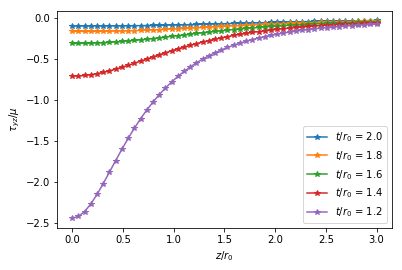

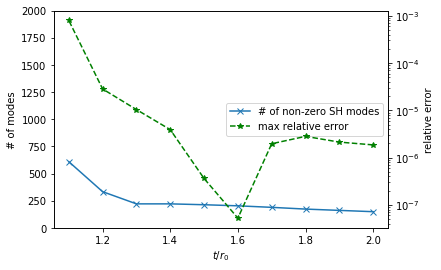

In [29]:
filename = '../figures/case2-result-ts.mat'
n = 5
obj_x = np.empty((n, ), dtype=np.object)
obj_y = np.empty((n, ), dtype=np.object)
obj_label = np.empty((n, ), dtype=np.object)

plt.figure()
plotlist = np.arange(0, n, dtype=np.int)*2
for i in range(n):
    plt.plot(x3, fx_list[plotlist[i]][:,:,:,1,2].flatten(), '*-')
    obj_x[i] = x3.copy()
    obj_y[i] = fx_list[plotlist[i]][:,:,:,1,2].flatten()
    obj_label[i] = '$t/r_0$ = '+str(ts[plotlist[i]]/a)
    #plt.plot(x3, gavazza1974(80, x3*a, [ts[i], ], mu, 0, nu, nu, a, b).flatten())
legs_t = ['$t/r_0$ = '+str(ts[plotlist[i]]/a) for i in range(5)]
plt.legend(legs_t)
#plt.ylim(0, 3)
plt.xlabel(r'$z/r_0$')
plt.ylabel(r'$\tau_{yz}/\mu$')
#plt.savefig('../figures/case2-result-ts.png', dpi=1000)

savemat(filename, {'X': obj_x, 'Y': obj_y, 'label': obj_label})
print(whosmat(filename))

filename = '../figures/case2-err-ts.mat'
n = 2
obj_x = np.empty((n, ), dtype=np.object)
obj_y = np.empty((n, ), dtype=np.object)
obj_x[0], obj_x[1] = (ts/a, ts/a)
obj_y[0], obj_y[1] = (active_list, np.absolute(error_list))
obj_label = np.array(['Number of Non-zero SH Modes', 'Max Relative Error'], dtype=np.object)
savemat(filename, {'X': obj_x, 'Y': obj_y, 'label': obj_label})
print(whosmat(filename))

fig, ax1 = plt.subplots()
ln1 = ax1.plot(ts/a, active_list, '-x')
ax1.set_ylim(0, 2000)
ax1.set_xlabel('$t/r_0$')
ax1.set_ylabel('# of modes')
ax2 = ax1.twinx()
ln2 = ax2.semilogy(ts/a, np.absolute(error_list), '--*g', label='relative error')
ax2.set_ylabel('relative error')
ax1.legend(ln1+ln2, ['# of non-zero SH modes','max relative error'],loc='right')
#plt.savefig('../figures/case2-error-ts.png', dpi=1000)
plt.show()